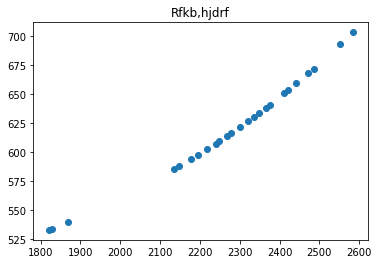

In [2]:
import matplotlib.pyplot as plt
import numpy as np

lamb = 10**(-1)*np.array([7032, 6929, 6717, 6678, 6599, 6533, 6507, 6402, 6383, 6334, 6305, 6267, 6217, 6164, 6143, 6096, 6074, 6030, 5976, 5945, 5882, 5852, 5401, 5341, 5331])
N = np.array([2584, 2552, 2486, 2472, 2442, 2420, 2412, 2376, 2366, 2348, 2336, 2320, 2300, 2278, 2268, 2248, 2240, 2218, 2194, 2178, 2148, 2134, 1868, 1828, 1820])
plt.scatter(N, lamb)
plt.title('Rfkb,hjdrf')
plt.show()


[[5.20785216e+06 1.41930870e+06 2.27344000e+03]
 [1.41930870e+06 3.86972815e+05 6.20552000e+02]
 [2.27344000e+03 6.20552000e+02 1.00000000e+00]]
[[3.26931202e+09]
 [8.90148976e+08]
 [1.41930870e+06]]
A =  [232.8922758] dA = 0.00010203671431304771
C =  [3924.54138907] dC = 0.0013732027216430383
D =  [-1545539.91956638] dD = 531.3921230345085


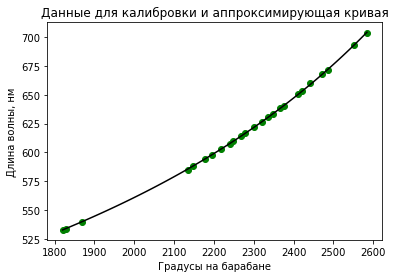

In [3]:
from scipy.linalg import solve
import math as m

z = lamb * N
x = N
y = lamb
M11 = np.average(x*x)
M12 = np.average(x*y)
M13 = np.average(x)
M22 = np.average(y*y)
M23 = np.average(y)
M21 = M12
M31 = M13
M32 = M23
M33 = 1
y1 = np.average(z*x)
y2 = np.average(z*y)
y3 = np.average(z)
M = np.array([[M11, M12, M13],
             [M21, M22, M23],
             [M31, M32, M33]])
print(M)
Y = np.array([y1, y2, y3]).reshape((3,1))
print(Y)
X = solve(M,Y)
A = X[0]
C = X[1]
D = X[2]
Er_min = 1/25*((z-A*x-C*y-D)@(z-A*x-C*y-D))
print('A = ', A,'dA =', m.sqrt(Er_min)/M11)
print('C = ', C,'dC =', m.sqrt(Er_min)/M22)
print('D = ', D,'dD =', m.sqrt(Er_min))

ArgX = np.linspace(1820,2584,100)
ArgY = A + ((D + A*C)/(ArgX-C))
plt.plot(ArgX, ArgY, color = 'Black')
plt.scatter(N, lamb, color = 'Green')
plt.title('Данные для калибровки и аппроксимирующая кривая')
plt.xlabel('Градусы на барабане')
plt.ylabel('Длина волны, нм')
plt.show()


[0.795 0.63  0.51  0.395 0.852 1.064]
[3.55548780e+15 3.35971940e+15 3.14629943e+15 2.91272786e+15
 3.73570758e+15 3.90216037e+15]


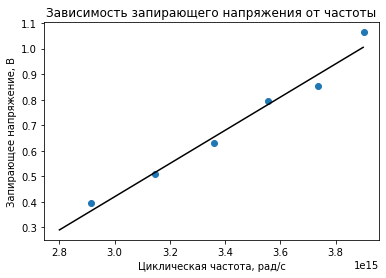

In [10]:
N1 = np.array([1800, 2000, 2200, 2400, 1600, 1400])
V0 = np.array([-0.795, -0.630, -0.510, -0.395, -0.852, -1.064])
LAM = A + ((D + A*C)/(N1-C))
w = 2*m.pi*3*10**8/(10**(-9)*LAM)
print(-V0)
print(w)
ArX = np.linspace(2.8*10**15, 3.9*10**15, 100)
ArY = -1.53 + (6.5*10**(-16)*ArX)
plt.scatter(w, -V0)
plt.plot(ArX, ArY, color ='Black')
plt.title('Зависимость запирающего напряжения от частоты')
plt.xlabel('Циклическая частота, рад/с')
plt.ylabel('Запирающее напряжение, В')
plt.show()